# TFY4195 H2022 - Assignment 3
*Alexander Laloi Dybdahl*

**Importing necessary libraries and initializing constants**

$$\lambda = 632.8nm$$

$$k = \frac{2 \pi}{\lambda}$$

$$d = 2m$$

$$b = 0.04mm$$

$$a = C b$$


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelmax
from scipy.signal import argrelmin
from matplotlib.colors import LogNorm

λ = 632.8*10**-9                             # [m] wavelength
k = 2 * np.pi / λ                            # [1/m] wave constant
    
L = 2                                        # [m] distance

b = 0.04*10**-3                              # [m] slit opening
C = 6                                        # proportionality constant
a = C * b                                    # slit separation


**Initializing necessary functions**

Slit width:
$$\beta = \frac{1}{2} k b \sin{\theta}$$

Slit separation:
$$\alpha = C \beta$$

Irradiance for double-slit:
$$I/I_0 = 4 (\frac{\sin{\beta}}{\beta})^2 \cos^2{\alpha}$$

Irradiance for multiple slits:
$$I/I_0 = (\frac{\sin{\beta}}{\beta})^2 (\frac{\sin{N \alpha}}{\sin{\alpha}})^2$$

Width of the central maximum:
$$W = \frac{2L\lambda}{b}$$

In [2]:
def β(θ):
    beta = 1 / 2 * k * b * np.sin(θ)
    return beta

def α(β):
    alpha = C * β
    return alpha

def I2(θ,N): # Double-slit diffractoin
    irradiance = 4 * (np.sin(β(θ))/β(θ))**2 * np.cos(α(β(θ)))**2
    return irradiance

def I(θ,N): # Diffraction from many slits
    irradiance = (np.sin(β(θ))/β(θ))**2 * (np.sin(N * α(β(θ))) / np.sin(α(β(θ))))**2
    return irradiance

def W(L):
    width = 2 * L * λ / b
    return width

**Single-slit Fraunhofer diffraction**

Irradiance:
$$I/I_0 = (\frac{\sin{\beta}}{\beta})^2$$

Maximas at:
$$\beta = \tan{\beta}$$

Solutions are:
$$\beta = [\pm1.43\pi, \pm2.46\pi, \pm3.47\pi,...]$$

Conditions for zero:
$$m\lambda = b\sin{\theta} \qquad m=\pm1,\pm2,...$$

Interference factor peaks at $N^2$

Using values for $\theta$ in the interval $[-0.02,0.02]$

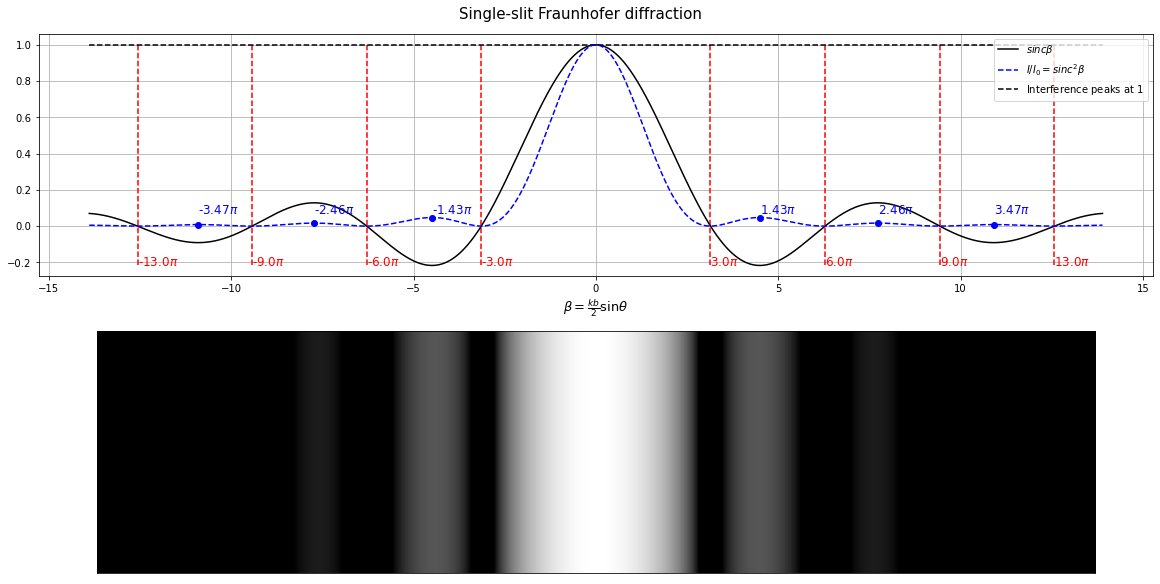

In [3]:
h = 10000
θ = np.linspace(-0.07, 0.07, h)

# Plotting
fig, axs = plt.subplots(2, 1, figsize = (16, 8), constrained_layout = True)
fig.suptitle(f"Single-slit Fraunhofer diffraction", fontsize = 15)

# Plotting Irradiance
axs[0].set_xlabel(r"$\beta = \frac{kb}{2} \sin\theta$", fontsize = 13)

# Single-slit 
func = np.sin(β(θ))/β(θ)
axs[0].plot(β(θ), func, label = r"$sinc \beta$", color = 'black')
axs[0].plot(β(θ), func**2, "--", label = r"$I/I_0 = sinc^2\beta$", color = 'blue')
axs[0].plot(β(θ)[argrelmax(func**2)], (func**2)[argrelmax(func**2)], 'o', color = 'blue')
for i in β(θ)[argrelmax(func**2)]:
    axs[0].text(i, np.sinc(β(i)) + 0.07, f"{round(i/np.pi, 2)}$\pi$", fontsize = 12, color = 'blue')

axs[0].vlines(β(θ)[argrelmin(func**2)], np.min(func), np.max(func), linestyles='dashed', colors = 'red')
axs[0].hlines(np.max(func), β(θ[0]), β(θ[-1]), linestyles='dashed', colors = 'black', label = f"Interference peaks at $1$")

for i in β(θ)[argrelmin(func**2)]:
    axs[0].text(i, np.min(func), f"{round(i/np.pi, 2)}$\pi$", fontsize = 12, color = 'red')
axs[0].grid()
axs[0].legend()

# Plotting image
image = np.zeros((1000,h))
for i in range(h):
    image[:,i] = (func**2)[i]
axs[1].imshow(image, cmap='gist_gray', norm=LogNorm(vmin=0.01, vmax=1), aspect=2.43)
axs[1].get_xaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)
fig.savefig("Single-slit")



The plot confirms both the maximums solutions as calculated before, and the zero conditions: $m\pi, m=\pm1,\pm2,...$

**Defining irradiance plotting function for multiple slits**

In [4]:
def plot_irradiance(N, f, zeros = False):
    # Plotting
    fig, axs = plt.subplots(3, 1, figsize = (16, 8), constrained_layout = True)
    fig.suptitle(f"Interference, diffraction and irradiance for N = {N}", fontsize = 15)
    axs[0].set_xlabel(r"$\beta = \frac{kb}{2} \sin\theta$", fontsize = 13)
    axs[1].set_xlabel(r"$\beta = \frac{kb}{2} \sin\theta$", fontsize = 13)

    func = f(θ, N)
    axs[0].set_title("Interference and diffraction")
    # Interference
    axs[0].plot(β(θ), (np.sin(N * α(β(θ))) / np.sin(α(β(θ))))**2, label = r"$\sin^2 N\alpha / \sin^2 \alpha$", color = 'blue')
    # Diffraction
    axs[0].plot(β(θ), N**2 * (np.sin(β(θ))/β(θ))**2, "--", label = r"$sinc^2\beta$", color = 'green')
    axs[0].grid()
    axs[0].legend()

    # Irradiance
    axs[1].set_title("Irradiance")
    axs[1].plot(β(θ), func, label = r"$I/I_0 = sinc^2\beta \sin^2 N\alpha / \sin^2 \alpha$", color = 'red')
    axs[1].hlines(np.max(func), β(θ[0]), β(θ[-1]), linestyles='dashed', colors = 'black', label = f"Interference peaks at ${N**2}$")

    # Plotting zeros
    if zeros:
        axs[1].vlines(β(θ)[argrelmin(func)], np.min(func), np.max(func), linestyles='dashed', colors = 'black')
        for i in β(θ)[argrelmin(func)]:
            axs[1].text(i, np.min(func), f"{round(i/np.pi, 1)}$\pi$", fontsize = 12)
    axs[1].grid()
    axs[1].legend()

    # Plotting image
    image = np.zeros((1000,h))
    for i in range(h):
        image[:,i] = f(θ[i], N)
    axs[2].imshow(image, cmap='gist_gray', norm=LogNorm(vmin=0.01, vmax=1), aspect=1.3)
    axs[2].set_xlabel(r"$\beta$")
    axs[2].get_xaxis().set_visible(False)
    axs[2].get_yaxis().set_visible(False)
    fig.savefig(f"Multiple slit N = {N}, C = {C}, b = {b}")


**Double-slit diffractoin**

Parameters for Figure 11.14b: $N = 2$ and $C = 6$, aka $\alpha = 6\beta$ and using function for double-slit

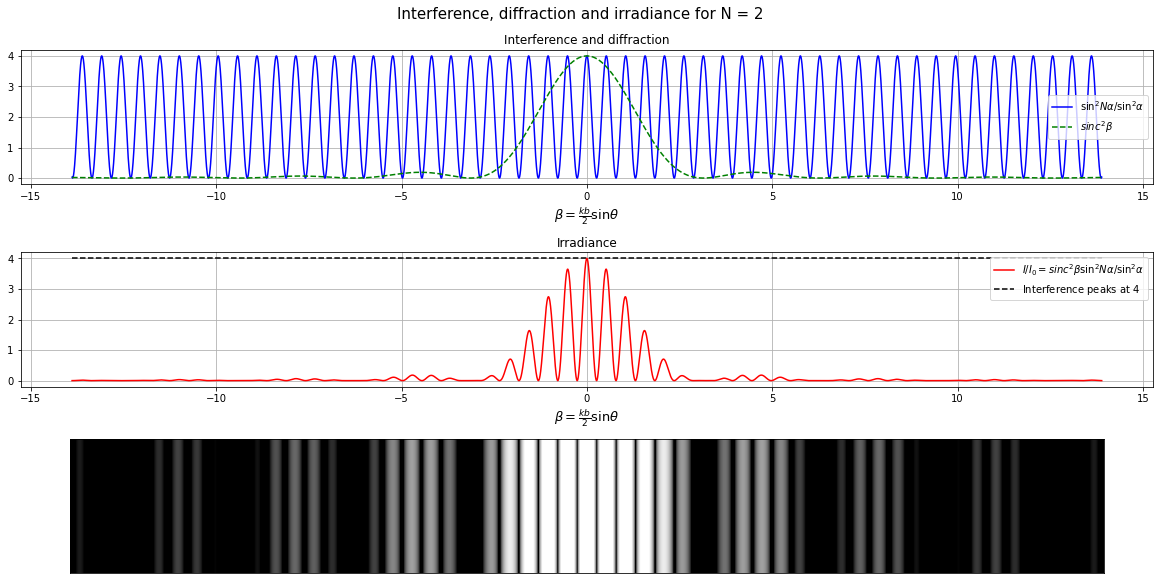

In [5]:
C = 6
plot_irradiance(2, I2)

This image corresponds to the figure, in addition to having an interference factor peak at $N^2 = 4 I_0$

**Multiple slit diffraction**

Using $N = [3,4]$, $C = 6$ and function for multiple slits

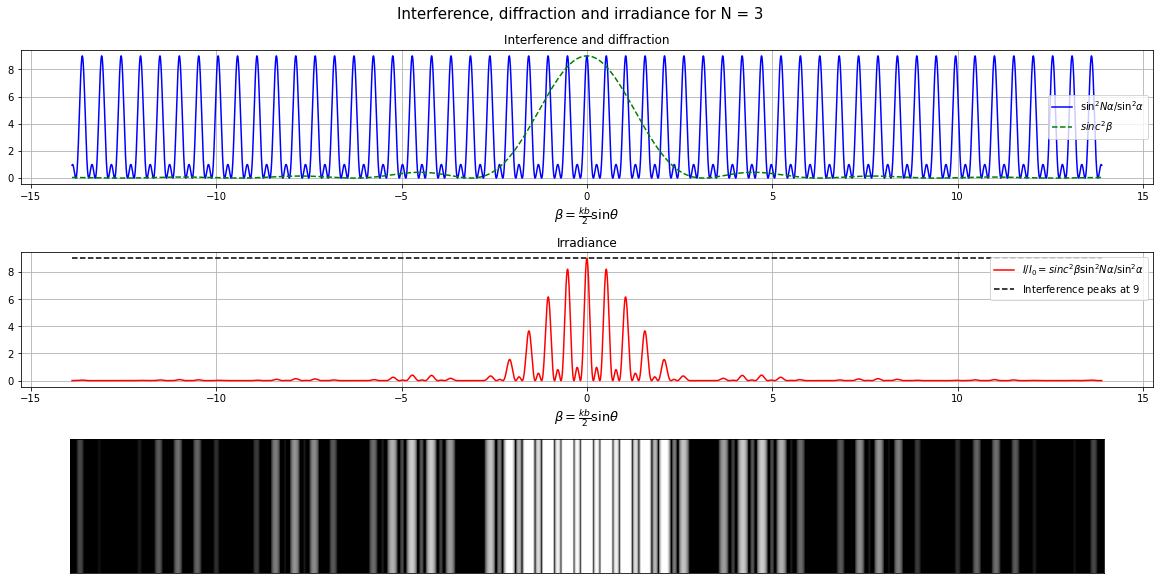

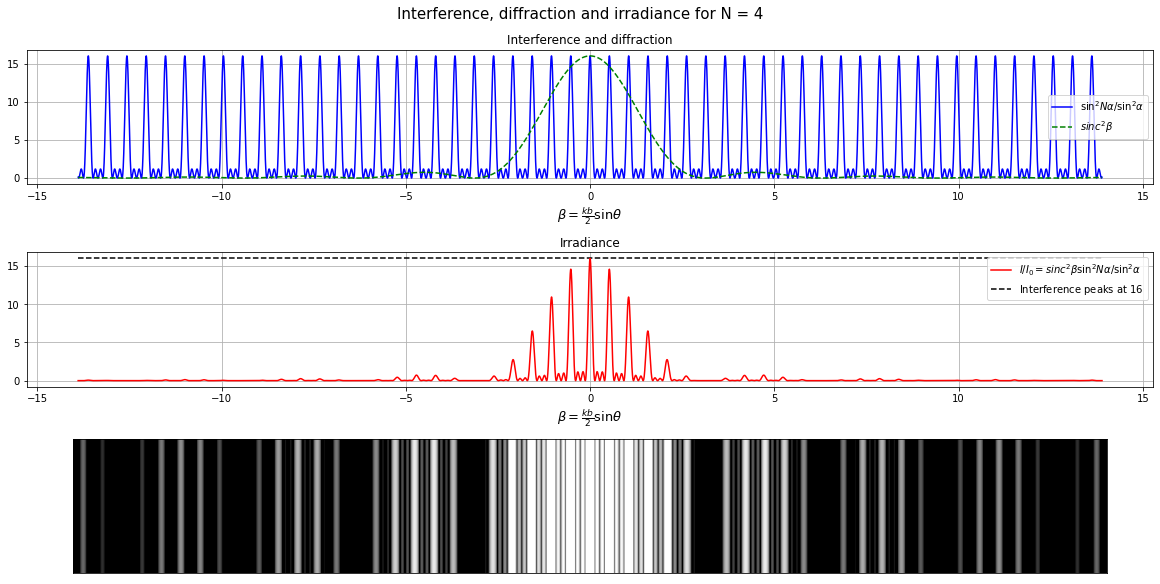

In [6]:
for i in range(3, 5):
    plot_irradiance(i, I)

Same procedure but with $C = 12$ and $N = 8$, which corresponds to figure 11.15 in PP

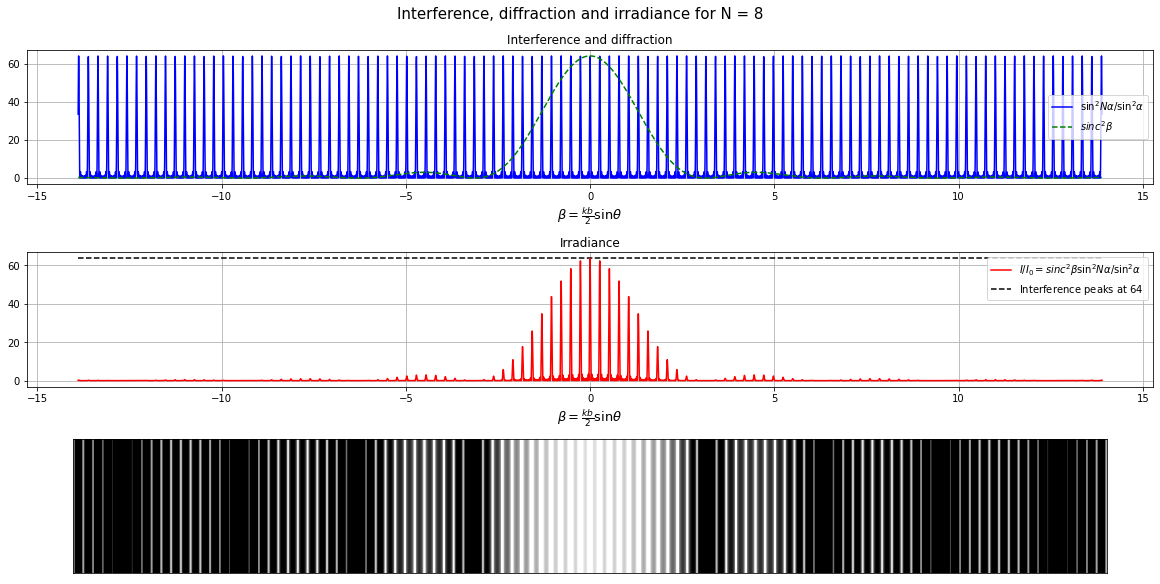

In [7]:
C = 12
plot_irradiance(8, I)

Using a larger constant $C$ for $\alpha = C \beta$, leads to additional fringes

**Small angle approximations**

I have used angles in the interval $\theta \in [-0.07, 0.07]$

Investigating errors in small angle approximations:

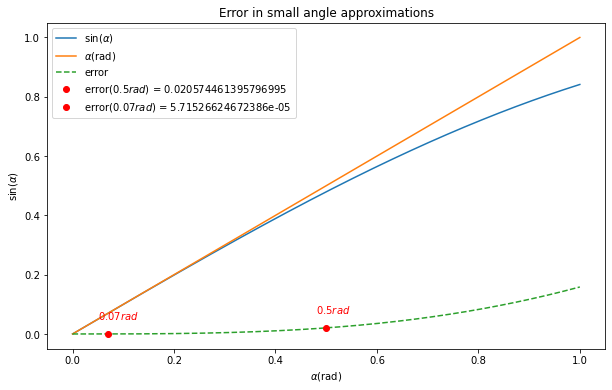

In [8]:
alpha = np.linspace(0, 1, 1000)

plt.figure(figsize =(10,6))
plt.title("Error in small angle approximations")
plt.plot(alpha, np.sin(alpha), label=r"sin($\alpha$)")
plt.plot(alpha, alpha, label=r"$\alpha$(rad)")
plt.plot(alpha, alpha-np.sin(alpha), '--', label="error")

rads = [0.5, 0.07]

for rad in rads:
    err = round(rad-np.sin(rad),100)
    plt.plot(rad, err, 'o', label=f"error({rad}$rad$) = {err}", color='r')
    plt.text(rad-0.02, err+0.05, f"{rad}$rad$", color='r')

plt.xlabel(r"$\alpha$(rad)")
plt.ylabel(r"sin($\alpha$)")
plt.legend()
plt.show()

Using angles between $\theta \in [-0.07, 0.07]$ corresponds to an error equal to or below $5.72 \cdot 10^-5$, which is acceptable in our experiment

**Beam spreading**

Calculating beam spreading for different distances using $\lambda = 632.8$mm and $b = 0.04mm$

In [9]:
distances = np.array([1, 2, 3, 4]) # distance in meters

for L in distances:
    print(f"W({L}m) =",round(W(L)*10**3,2),"mm")

W(1m) = 31.64 mm
W(2m) = 63.28 mm
W(3m) = 94.92 mm
W(4m) = 126.56 mm


For $L = 2m$ the spreading is $63.28mm$

**Conclusion**

This program has confirmed the theoretical procedures and calculations such as calculated values for maximas and conditions for zero, in addition to irradiance factor peak equal to $N^2$ and that the error is insignificant for small angles
